In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
from termcolor import colored
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from natsort import natsorted

In [3]:
# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Globally setting font sizes via rcParams should be done with 

params = {
    'font.size': 11,
    'figure.figsize': (10,3),
    'figure.dpi': 80,
    'savefig.dpi': 300,
    'legend.fontsize': 11,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'axes.labelsize': 11,
    'axes.axisbelow': True
         }
plt.rcParams.update(params)


# The defaults can be restored using
# plt.rcParams.update(plt.rcParamsDefault)

In [5]:
main_folder = os.getcwd() #attenzione pycharm scprits not in the same dir
folder_experiments = 'results/MAR_2022_20#robots_rho#0.9/pkl_pos'

In [6]:
print(main_folder)

/home/luigi/Documents/ARGoS/argos-LMCRW-script


In [7]:
window_size = 1 #10s
windows = np.array([1, 2, 3, 4, 5, 6, 9, 10, 12, 15, 18, 20, 30, 45, 60])

In [8]:
for dirName, subdirList, fileList in os.walk(os.path.join(main_folder, folder_experiments)):
    print(colored("DirName:", 'blue'), dirName)
    num_robots = -1
    for fileName in natsorted(fileList):
        print(colored("\tfileName:", 'blue'), fileName)

        if 'real' in fileName:
            exp_type = 'real'
        else:
            exp_type = 'simulated'
        
        elements = fileName.split('_')
        for e in elements:
            if e.startswith('robots'):
                num_robots = int(e.split('#')[1])
                print('\tnum_robots:', num_robots)

        if num_robots == -1:
            print('Error!!! num_robots not a right value')
            exit(-1)

        np_position = np.load(os.path.join(main_folder, folder_experiments, fileName))

        print('\tnp_position.shape:', np_position.shape)
        
        msd_dict = dict()
        for window in windows:
            print('\t window: {}'.format(window))
            msd_matrix = np.array([])
            for f in range(window, np_position.shape[0], window):
    #             print('tf: {}, ti: {}'.format(f, f - window))
                tf = np_position[f]
                ti = np_position[f - window]
#                 print('tf.shape:', tf.shape)
                sq_distance = np.sum((tf - ti) ** 2, axis=1)

                msd_matrix = np.row_stack([msd_matrix, sq_distance]) if msd_matrix.size else sq_distance
            print('\t msd_matrix.shape: {}'.format(msd_matrix.shape))
            msd_dict[window] = np.mean(msd_matrix)

DirName: /home/luigi/Documents/ARGoS/argos-LMCRW-script/results/MAR_2022_20#robots_rho#0.9/pkl_pos
	fileName: robots#20_alpha#2.0_rho#0.9_real_pos.npy
	num_robots: 20
	np_position.shape: (181, 200, 2)
	 window: 1
	 msd_matrix.shape: (180, 200)
	 window: 2
	 msd_matrix.shape: (90, 200)
	 window: 3
	 msd_matrix.shape: (60, 200)
	 window: 4
	 msd_matrix.shape: (45, 200)
	 window: 5
	 msd_matrix.shape: (36, 200)
	 window: 6
	 msd_matrix.shape: (30, 200)
	 window: 9
	 msd_matrix.shape: (20, 200)
	 window: 10
	 msd_matrix.shape: (18, 200)
	 window: 12
	 msd_matrix.shape: (15, 200)
	 window: 15
	 msd_matrix.shape: (12, 200)
	 window: 18
	 msd_matrix.shape: (10, 200)
	 window: 20
	 msd_matrix.shape: (9, 200)
	 window: 30
	 msd_matrix.shape: (6, 200)
	 window: 45
	 msd_matrix.shape: (4, 200)
	 window: 60
	 msd_matrix.shape: (3, 200)


In [ ]:
windows

In [ ]:
np.arange(windows.size)

In [ ]:
fig, ax = plt.subplots()
ax.grid(True,linestyle='--',color='0.7')
x_axis = np.arange(windows.size)
y_axis = np.fromiter(msd_dict.values(), dtype=float)
ax.plot(x_axis, y_axis, marker='o')

# plt.xlim(-1, windows.size)

plt.xticks(ticks=x_axis, labels=windows)
plt.tight_layout()
plt.show()

In [9]:
main_folder = os.getcwd() #attenzione pycharm scprits not in the same dir

baseline_folder = 'results/ALL/pos_pkl/Simulated/baseline'
simpleExperiment_folder = 'results/ALL/pos_pkl/Simulated/simple_experiment_100_runs'
biasExperiment_folder = 'results/ALL/pos_pkl/Simulated/bias_experiment_100_runs'
randomAngle_folder = 'results/ALL/pos_pkl/Simulated/random_angle_100_runs'
bouncingAngle_folder = 'results/ALL/pos_pkl/Simulated/bouncing_angle_100_runs'

windows = np.array([1, 2, 3, 4, 5, 6, 9, 10, 12, 15, 18, 20, 30, 45, 60])


In [10]:
def evaluate_MSD(main_folder, folder_experiments):
    msd_dict = {}
    windows = np.array([1, 2, 3, 4, 5, 6, 9, 10, 12, 15, 18, 20, 30, 45, 60])
    
    for dirName, subdirList, fileList in os.walk(os.path.join(main_folder, folder_experiments)):
        print(colored("DirName:", 'blue'), dirName)
        num_robots = -1
        alpha = -1
        rho = -1
        for fileName in natsorted(fileList):
            if 'real' in fileName:
                exp_type = 'real'
                continue
            else:
                exp_type = 'simulated'

            print(colored("\tfileName:", 'blue'), fileName)
            elements = fileName.split('_')
            for e in elements:
                if e.startswith('robots'):
                    num_robots = int(e.split('#')[1])
                if e.startswith('alpha'):
                    alpha = e.split('#')[1]
                if e.startswith('rho'):
                    rho = e.split('#')[1]

            if num_robots == -1:
                print('Error!!! num_robots not a right value')
                exit(-1)

            if alpha == -1:
                print('Error!!! num_robots not a right value')
                exit(-1)

            if rho == -1:
                print('Error!!! num_robots not a right value')
                exit(-1)

            if num_robots not in msd_dict:
                msd_dict[num_robots] = {}
            if alpha not in msd_dict[num_robots]:
                msd_dict[num_robots][alpha] = {}

            print('\tnum_robots: {}, alpha: {}, rho: {}'.format(num_robots, alpha, rho))

            np_position = np.load(os.path.join(main_folder, folder_experiments, fileName))

            print('\tnp_position.shape:', np_position.shape)

            msd = np.array([])
            for window in windows:
    #             print('\t window: {}'.format(window))
                msd_matrix = np.array([])
                for f in range(window, np_position.shape[0], window):
        #             print('tf: {}, ti: {}'.format(f, f - window))
                    tf = np_position[f]
                    ti = np_position[f - window]
    #                 print('tf.shape:', tf.shape)
                    sq_distance = np.sum((tf - ti) ** 2, axis=1)

                    msd_matrix = np.row_stack([msd_matrix, sq_distance]) if msd_matrix.size else sq_distance
                msd = np.append(msd, np.mean(msd_matrix))


            msd_dict[num_robots][alpha][rho] = msd
            
    return msd_dict

In [11]:
# colors = ['red','blue','darkgreen','crimson','turquoise', 'khaki','navy', 'orangered', 'sienna']
Ncolors = 4
colormap = plt.cm.viridis  # LinearSegmentedColormap
Ncolors = min(colormap.N, Ncolors)
mapcolors = [colormap(int(x * colormap.N / Ncolors)) for x in range(Ncolors)]

In [12]:
def plot_MSD(msd_dict, baseline_msd_dict, top_v, saveFig=False, figName=''):
    for n_rob in msd_dict:
        for a in msd_dict[n_rob]:
            fig, ax = plt.subplots()
            ax.grid(True,linestyle='--',color='0.7')
    #         x_axis = np.arange(windows.size)
            x_axis = windows

            for i,r in enumerate(msd_dict[n_rob][a]):
                y_axis = msd_dict[n_rob][a][r]
                ax.plot(x_axis, y_axis, marker='o', label=r, color=mapcolors[i])
                
#                 if a != '1.4' and a != '1.8':
                y_base_axis = baseline_msd_dict[1][a][r]
                ax.plot(x_axis, y_base_axis, linestyle='dashed', color=mapcolors[i])

            
            if top_v:
                plt.ylim((0,top_v))
            else:
                plt.ylim((0,np.max(y_axis)+0.1))

            plt.xticks(ticks=x_axis, labels=windows)

            plt.title('num_robots: {}, alpha: {}'.format(n_rob, a))

            plt.legend(title="rho",loc=2)
            plt.tight_layout()
            
            if saveFig:
                plt.savefig(figName+'num_robots#{}_alpha#{}.png'.format(n_rob, a))
            plt.show()

In [13]:
baseline_dict = evaluate_MSD(main_folder, baseline_folder)
simpleExperiment_dict = evaluate_MSD(main_folder, simpleExperiment_folder)
biasExperiment_dict = evaluate_MSD(main_folder, biasExperiment_folder)
randomAngle_dict = evaluate_MSD(main_folder, randomAngle_folder)
bouncingAngle_dict = evaluate_MSD(main_folder, bouncingAngle_folder)


DirName: /home/luigi/Documents/ARGoS/argos-LMCRW-script/results/ALL/pos_pkl/Simulated/baseline
	fileName: baseline_2021-10-13_robots#1_alpha#1.2_rho#0.0_baseline_1800simulated_pos.npy
	num_robots: 1, alpha: 1.2, rho: 0.0
	np_position.shape: (181, 500, 2)
	fileName: baseline_2021-10-13_robots#1_alpha#1.2_rho#0.3_baseline_1800simulated_pos.npy
	num_robots: 1, alpha: 1.2, rho: 0.3
	np_position.shape: (181, 500, 2)
	fileName: baseline_2021-10-13_robots#1_alpha#1.2_rho#0.6_baseline_1800simulated_pos.npy
	num_robots: 1, alpha: 1.2, rho: 0.6
	np_position.shape: (181, 500, 2)
	fileName: baseline_2021-10-13_robots#1_alpha#1.2_rho#0.9_baseline_1800simulated_pos.npy
	num_robots: 1, alpha: 1.2, rho: 0.9
	np_position.shape: (181, 500, 2)
	fileName: baseline_2021-10-13_robots#1_alpha#1.6_rho#0.0_baseline_1800simulated_pos.npy
	num_robots: 1, alpha: 1.6, rho: 0.0
	np_position.shape: (181, 500, 2)
	fileName: baseline_2021-10-13_robots#1_alpha#1.6_rho#0.3_baseline_1800simulated_pos.npy
	num_robots: 1, 

	np_position.shape: (181, 5000, 2)
	fileName: simple_experiment_100_runs_2020-06-03_robots#50_alpha#1.2_rho#0.6_1800simulated_pos.npy
	num_robots: 50, alpha: 1.2, rho: 0.6
	np_position.shape: (181, 5000, 2)
	fileName: simple_experiment_100_runs_2020-06-03_robots#50_alpha#1.2_rho#0.9_1800simulated_pos.npy
	num_robots: 50, alpha: 1.2, rho: 0.9
	np_position.shape: (181, 5000, 2)
	fileName: simple_experiment_100_runs_2020-06-03_robots#50_alpha#1.6_rho#0.0_1800simulated_pos.npy
	num_robots: 50, alpha: 1.6, rho: 0.0
	np_position.shape: (181, 5000, 2)
	fileName: simple_experiment_100_runs_2020-06-03_robots#50_alpha#1.6_rho#0.3_1800simulated_pos.npy
	num_robots: 50, alpha: 1.6, rho: 0.3
	np_position.shape: (181, 5000, 2)
	fileName: simple_experiment_100_runs_2020-06-03_robots#50_alpha#1.6_rho#0.6_1800simulated_pos.npy
	num_robots: 50, alpha: 1.6, rho: 0.6
	np_position.shape: (181, 5000, 2)
	fileName: simple_experiment_100_runs_2020-06-03_robots#50_alpha#1.6_rho#0.9_1800simulated_pos.npy
	num_r

	fileName: simple_experiment_100_runs_2021-09-20_robots#50_alpha#1.8_rho#0.9_1800simulated_pos.npy
	num_robots: 50, alpha: 1.8, rho: 0.9
	np_position.shape: (181, 5000, 2)
	fileName: simple_experiment_100_runs_2021-09-22_robots#100_alpha#1.4_rho#0.0_1800simulated_pos.npy
	num_robots: 100, alpha: 1.4, rho: 0.0
	np_position.shape: (181, 10000, 2)
	fileName: simple_experiment_100_runs_2021-09-22_robots#100_alpha#1.4_rho#0.3_1800simulated_pos.npy
	num_robots: 100, alpha: 1.4, rho: 0.3
	np_position.shape: (181, 10000, 2)
	fileName: simple_experiment_100_runs_2021-09-22_robots#100_alpha#1.4_rho#0.6_1800simulated_pos.npy
	num_robots: 100, alpha: 1.4, rho: 0.6
	np_position.shape: (181, 10000, 2)
	fileName: simple_experiment_100_runs_2021-09-22_robots#100_alpha#1.4_rho#0.9_1800simulated_pos.npy
	num_robots: 100, alpha: 1.4, rho: 0.9
	np_position.shape: (181, 10000, 2)
	fileName: simple_experiment_100_runs_2021-09-22_robots#100_alpha#1.8_rho#0.0_1800simulated_pos.npy
	num_robots: 100, alpha: 1.8

	fileName: bias_experiment_100_runs_2020-07-09_robots#100_alpha#1.2_rho#0.0_1800simulated_pos.npy
	num_robots: 100, alpha: 1.2, rho: 0.0
	np_position.shape: (181, 10000, 2)
	fileName: bias_experiment_100_runs_2020-07-09_robots#100_alpha#1.2_rho#0.3_1800simulated_pos.npy
	num_robots: 100, alpha: 1.2, rho: 0.3
	np_position.shape: (181, 10000, 2)
	fileName: bias_experiment_100_runs_2020-07-09_robots#100_alpha#1.2_rho#0.6_1800simulated_pos.npy
	num_robots: 100, alpha: 1.2, rho: 0.6
	np_position.shape: (181, 10000, 2)
	fileName: bias_experiment_100_runs_2020-07-09_robots#100_alpha#1.2_rho#0.9_1800simulated_pos.npy
	num_robots: 100, alpha: 1.2, rho: 0.9
	np_position.shape: (181, 10000, 2)
	fileName: bias_experiment_100_runs_2020-07-09_robots#100_alpha#1.6_rho#0.0_1800simulated_pos.npy
	num_robots: 100, alpha: 1.6, rho: 0.0
	np_position.shape: (181, 10000, 2)
	fileName: bias_experiment_100_runs_2020-07-09_robots#100_alpha#1.6_rho#0.3_1800simulated_pos.npy
	num_robots: 100, alpha: 1.6, rho: 0.

	np_position.shape: (181, 1000, 2)
	fileName: random_angle_100_runs_2020-07-03_robots#10_alpha#2.0_rho#0.3_1800simulated_pos.npy
	num_robots: 10, alpha: 2.0, rho: 0.3
	np_position.shape: (181, 1000, 2)
	fileName: random_angle_100_runs_2020-07-03_robots#10_alpha#2.0_rho#0.6_1800simulated_pos.npy
	num_robots: 10, alpha: 2.0, rho: 0.6
	np_position.shape: (181, 1000, 2)
	fileName: random_angle_100_runs_2020-07-03_robots#10_alpha#2.0_rho#0.9_1800simulated_pos.npy
	num_robots: 10, alpha: 2.0, rho: 0.9
	np_position.shape: (181, 1000, 2)
	fileName: random_angle_100_runs_2020-07-03_robots#20_alpha#1.2_rho#0.0_1800simulated_pos.npy
	num_robots: 20, alpha: 1.2, rho: 0.0
	np_position.shape: (181, 2000, 2)
	fileName: random_angle_100_runs_2020-07-03_robots#20_alpha#1.2_rho#0.3_1800simulated_pos.npy
	num_robots: 20, alpha: 1.2, rho: 0.3
	np_position.shape: (181, 2000, 2)
	fileName: random_angle_100_runs_2020-07-03_robots#20_alpha#1.2_rho#0.6_1800simulated_pos.npy
	num_robots: 20, alpha: 1.2, rho: 0.

	fileName: random_angle_100_runs_2021-09-22_robots#20_alpha#1.4_rho#0.3_1800simulated_pos.npy
	num_robots: 20, alpha: 1.4, rho: 0.3
	np_position.shape: (181, 2000, 2)
	fileName: random_angle_100_runs_2021-09-22_robots#20_alpha#1.4_rho#0.6_1800simulated_pos.npy
	num_robots: 20, alpha: 1.4, rho: 0.6
	np_position.shape: (181, 2000, 2)
	fileName: random_angle_100_runs_2021-09-22_robots#20_alpha#1.4_rho#0.9_1800simulated_pos.npy
	num_robots: 20, alpha: 1.4, rho: 0.9
	np_position.shape: (181, 2000, 2)
	fileName: random_angle_100_runs_2021-09-22_robots#20_alpha#1.8_rho#0.0_1800simulated_pos.npy
	num_robots: 20, alpha: 1.8, rho: 0.0
	np_position.shape: (181, 2000, 2)
	fileName: random_angle_100_runs_2021-09-22_robots#20_alpha#1.8_rho#0.3_1800simulated_pos.npy
	num_robots: 20, alpha: 1.8, rho: 0.3
	np_position.shape: (181, 2000, 2)
	fileName: random_angle_100_runs_2021-09-22_robots#20_alpha#1.8_rho#0.6_1800simulated_pos.npy
	num_robots: 20, alpha: 1.8, rho: 0.6
	np_position.shape: (181, 2000, 2

	np_position.shape: (181, 2000, 2)
	fileName: bouncing_angle_100_runs_2020-07-01_robots#50_alpha#1.2_rho#0.0_1800simulated_pos.npy
	num_robots: 50, alpha: 1.2, rho: 0.0
	np_position.shape: (181, 5000, 2)
	fileName: bouncing_angle_100_runs_2020-07-01_robots#50_alpha#1.2_rho#0.3_1800simulated_pos.npy
	num_robots: 50, alpha: 1.2, rho: 0.3
	np_position.shape: (181, 5000, 2)
	fileName: bouncing_angle_100_runs_2020-07-01_robots#50_alpha#1.2_rho#0.6_1800simulated_pos.npy
	num_robots: 50, alpha: 1.2, rho: 0.6
	np_position.shape: (181, 5000, 2)
	fileName: bouncing_angle_100_runs_2020-07-01_robots#50_alpha#1.2_rho#0.9_1800simulated_pos.npy
	num_robots: 50, alpha: 1.2, rho: 0.9
	np_position.shape: (181, 5000, 2)
	fileName: bouncing_angle_100_runs_2020-07-01_robots#50_alpha#1.6_rho#0.0_1800simulated_pos.npy
	num_robots: 50, alpha: 1.6, rho: 0.0
	np_position.shape: (181, 5000, 2)
	fileName: bouncing_angle_100_runs_2020-07-01_robots#50_alpha#1.6_rho#0.3_1800simulated_pos.npy
	num_robots: 50, alpha: 

	np_position.shape: (181, 2500, 2)
	fileName: bouncing_angle_100_runs_2021-09-22_robots#50_alpha#1.8_rho#0.6_1800simulated_pos.npy
	num_robots: 50, alpha: 1.8, rho: 0.6
	np_position.shape: (181, 2500, 2)
	fileName: bouncing_angle_100_runs_2021-09-22_robots#50_alpha#1.8_rho#0.9_1800simulated_pos.npy
	num_robots: 50, alpha: 1.8, rho: 0.9
	np_position.shape: (181, 2500, 2)
	fileName: bouncing_angle_100_runs_2021-09-22_robots#100_alpha#1.4_rho#0.0_1800simulated_pos.npy
	num_robots: 100, alpha: 1.4, rho: 0.0
	np_position.shape: (181, 2000, 2)
	fileName: bouncing_angle_100_runs_2021-09-22_robots#100_alpha#1.4_rho#0.3_1800simulated_pos.npy
	num_robots: 100, alpha: 1.4, rho: 0.3
	np_position.shape: (181, 2000, 2)
	fileName: bouncing_angle_100_runs_2021-09-22_robots#100_alpha#1.4_rho#0.6_1800simulated_pos.npy
	num_robots: 100, alpha: 1.4, rho: 0.6
	np_position.shape: (181, 2000, 2)
	fileName: bouncing_angle_100_runs_2021-09-22_robots#100_alpha#1.4_rho#0.9_1800simulated_pos.npy
	num_robots: 100,

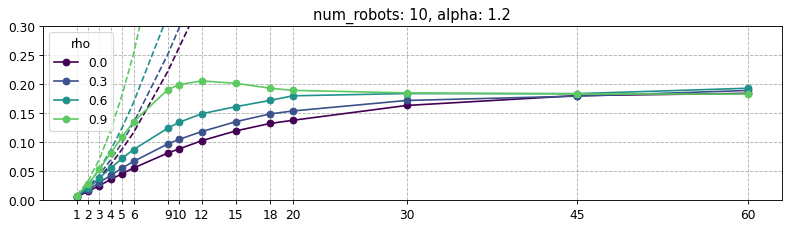

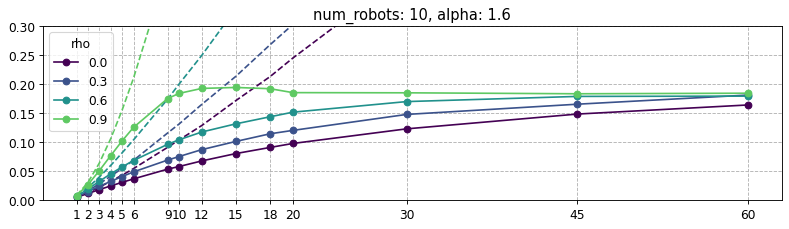

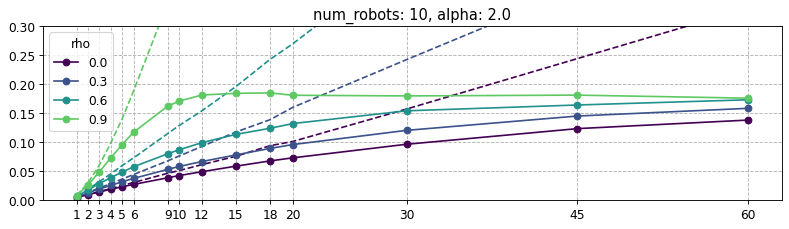

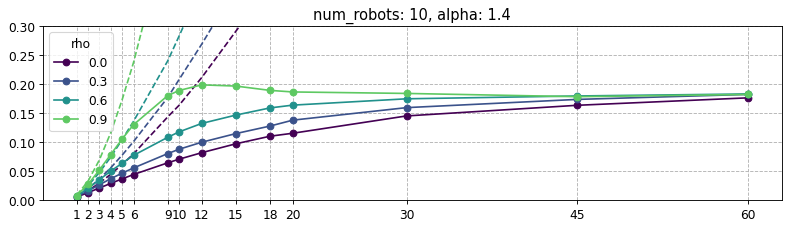

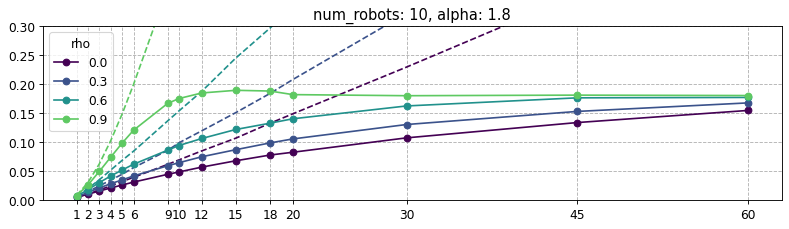

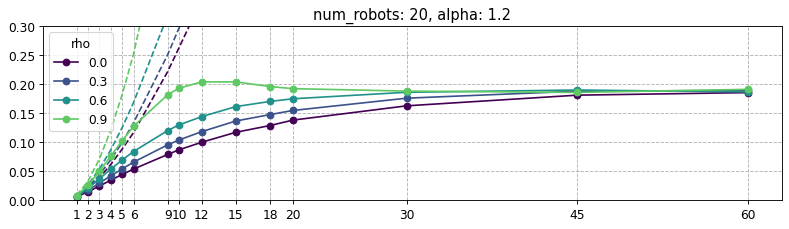

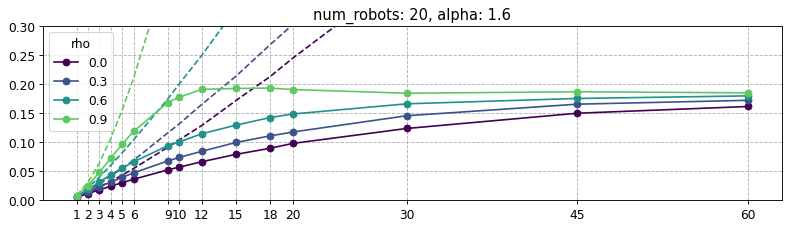

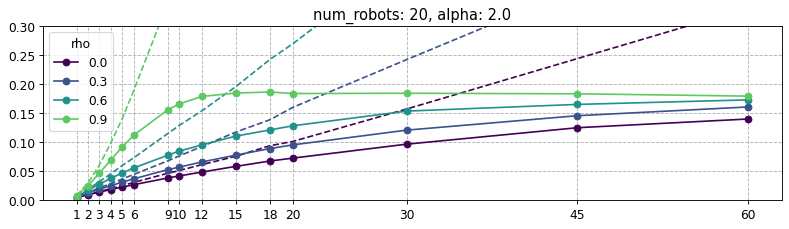

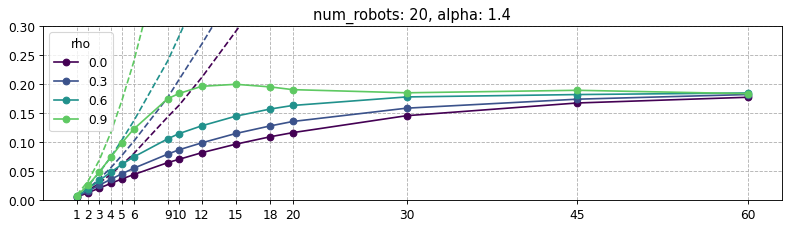

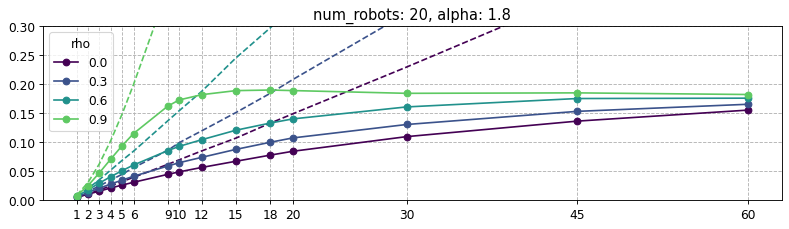

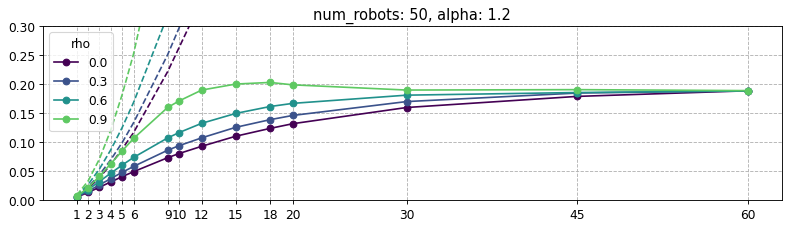

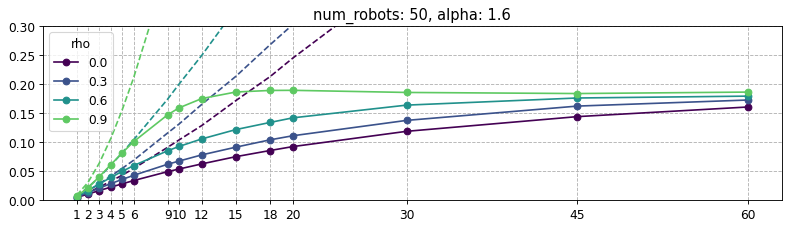

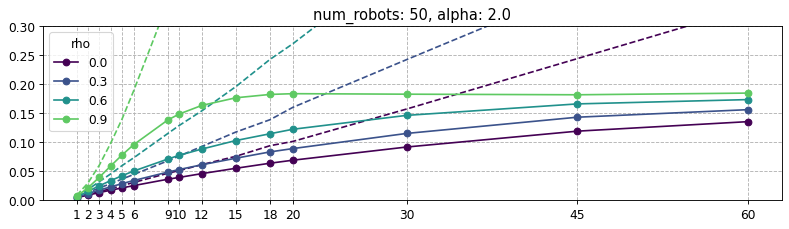

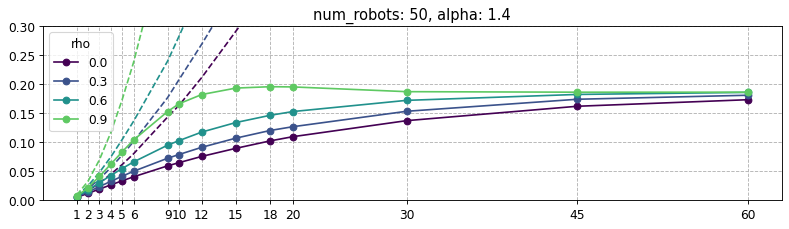

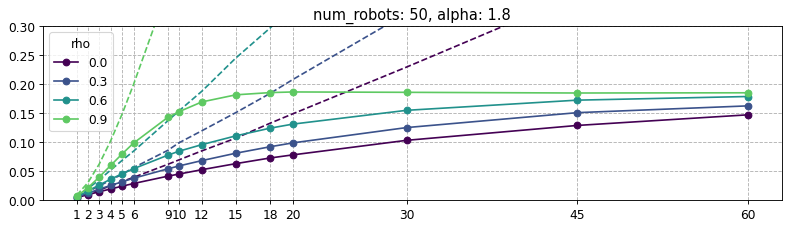

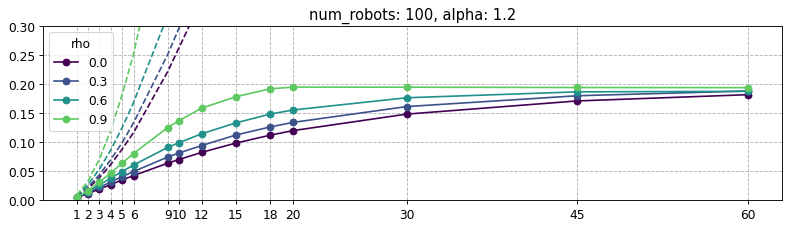

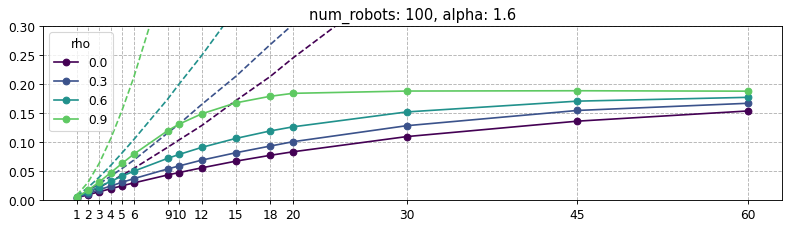

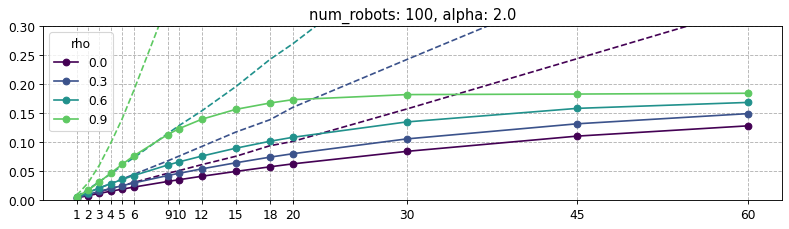

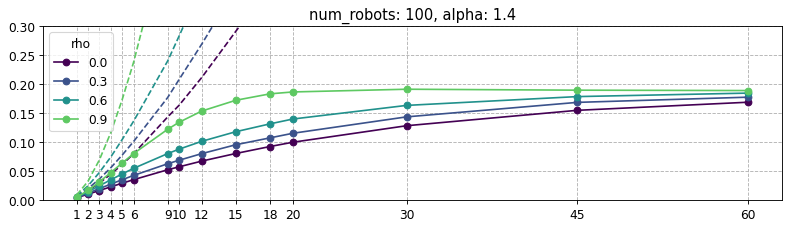

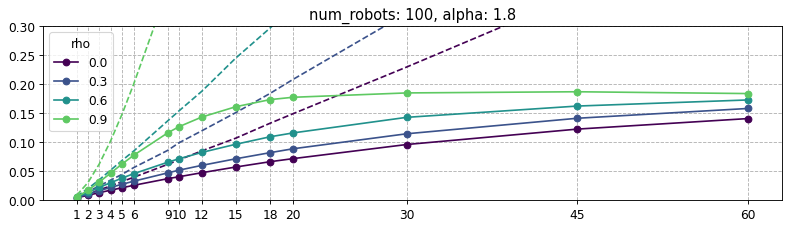

In [14]:
plot_MSD(randomAngle_dict, baseline_dict, top_v=0.3, saveFig=True, figName='randomAngle_')

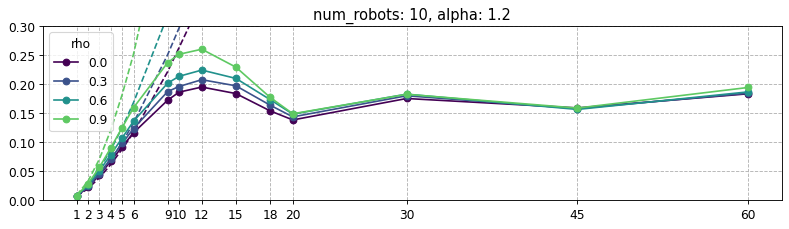

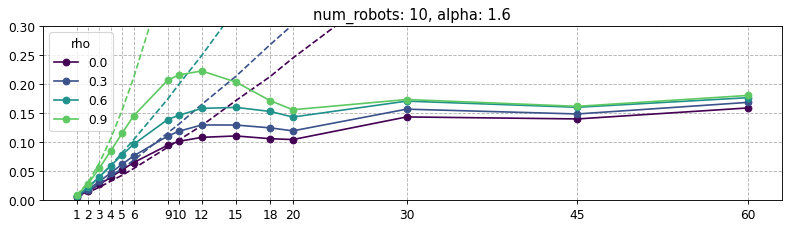

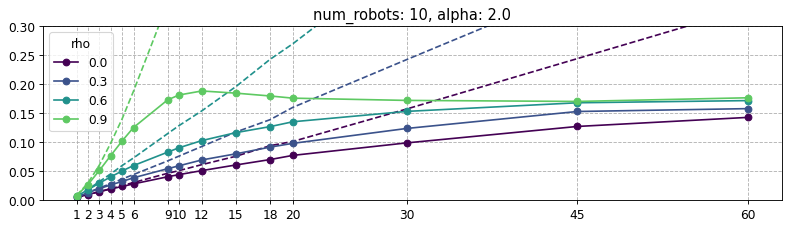

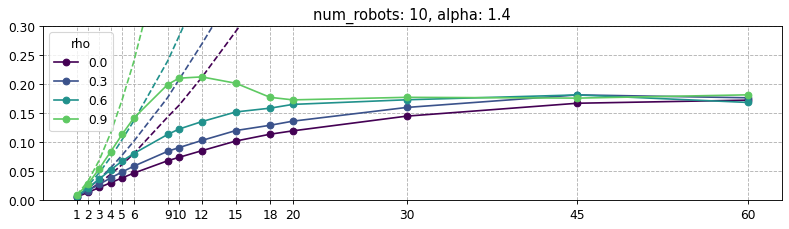

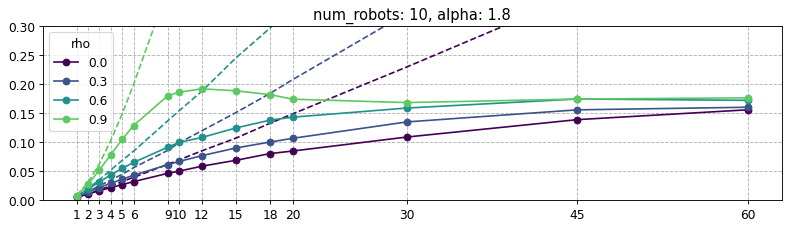

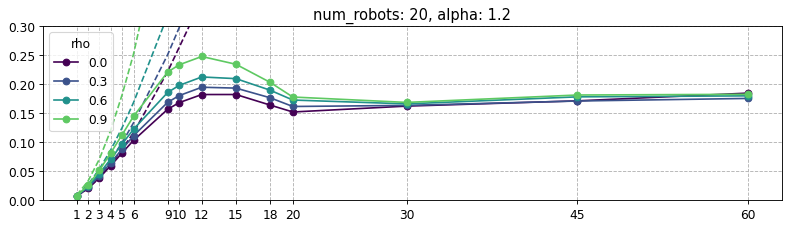

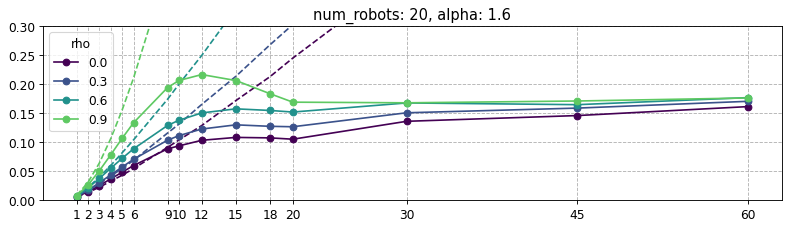

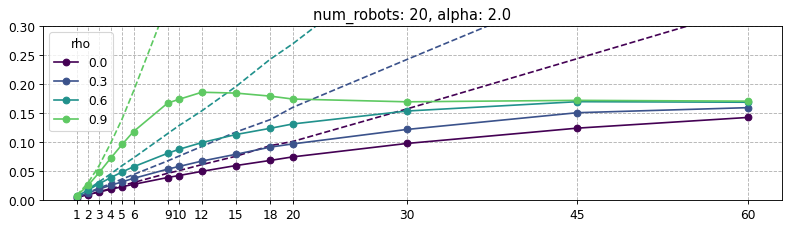

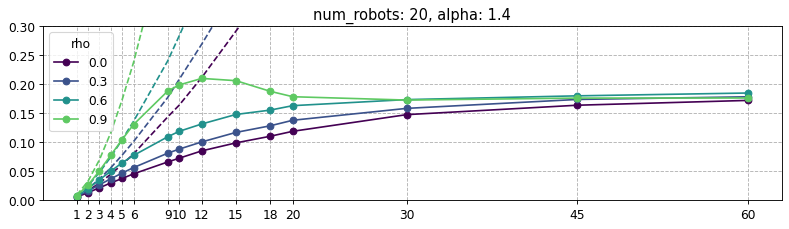

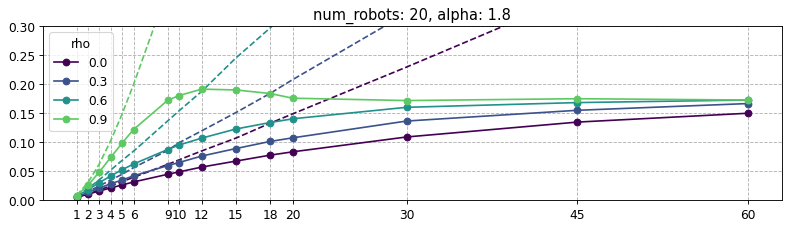

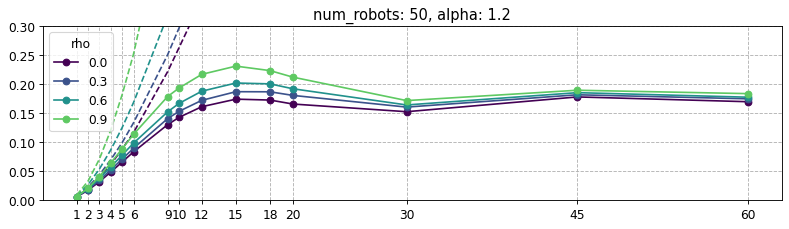

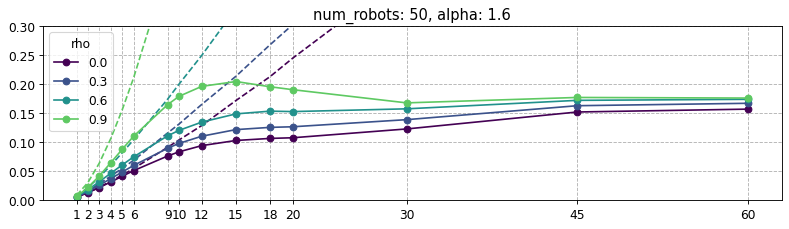

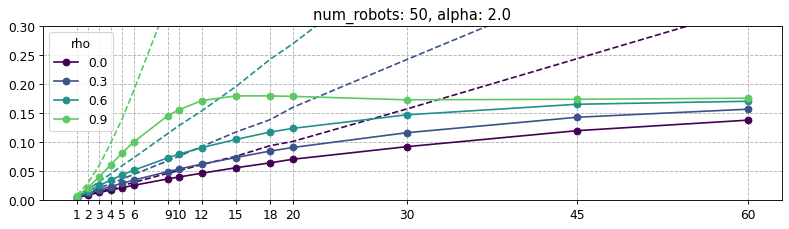

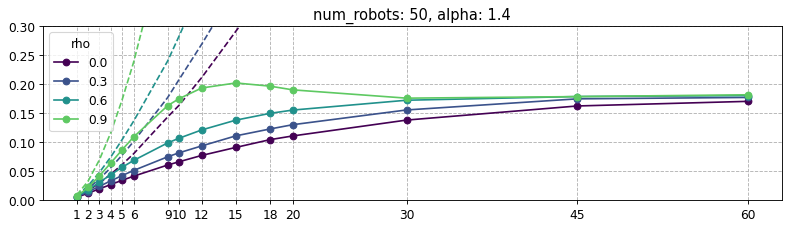

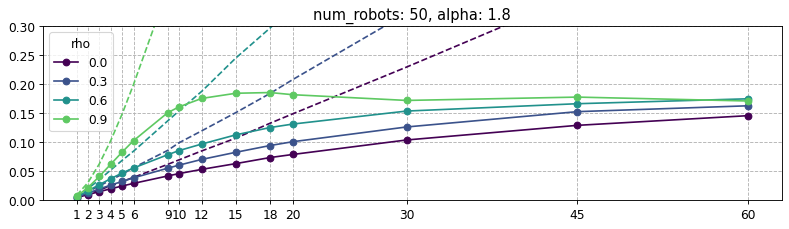

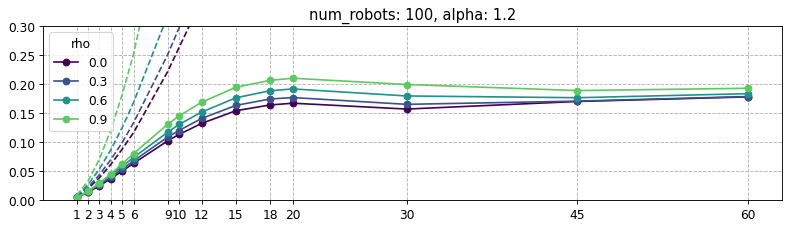

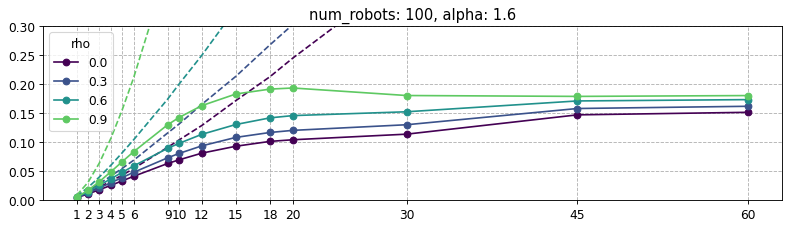

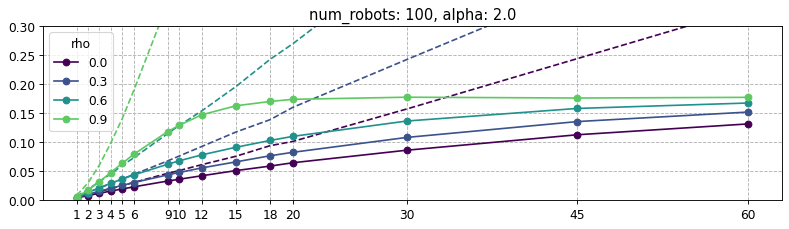

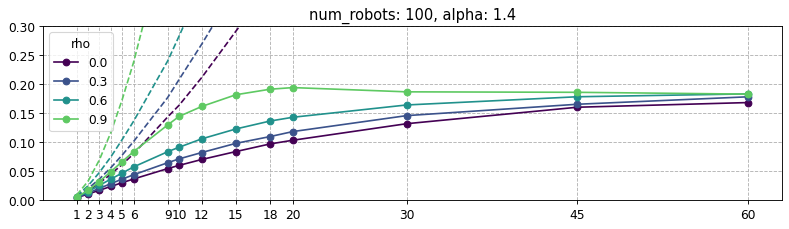

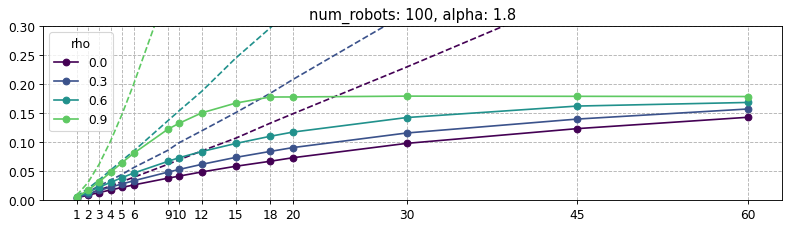

In [15]:
plot_MSD(bouncingAngle_dict, baseline_dict, top_v=0.3, saveFig=True, figName='bouncingAngle_')

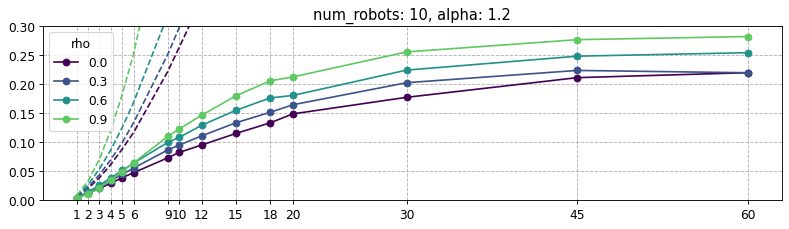

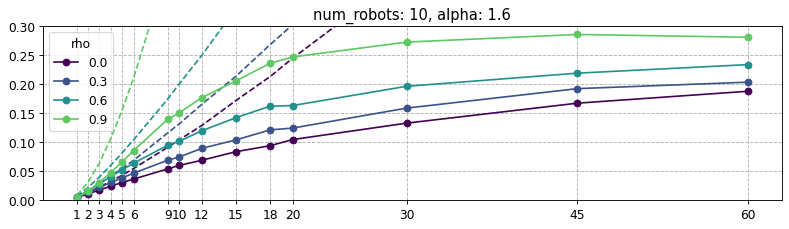

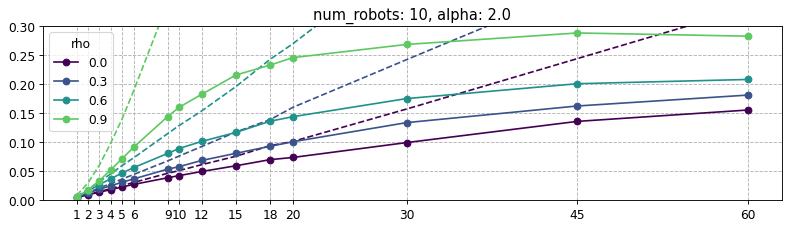

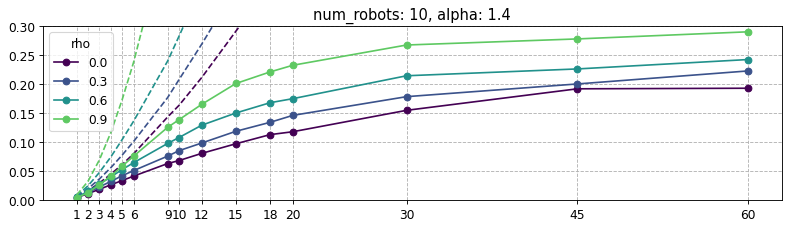

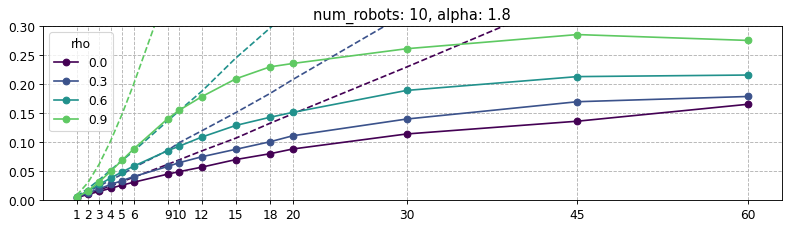

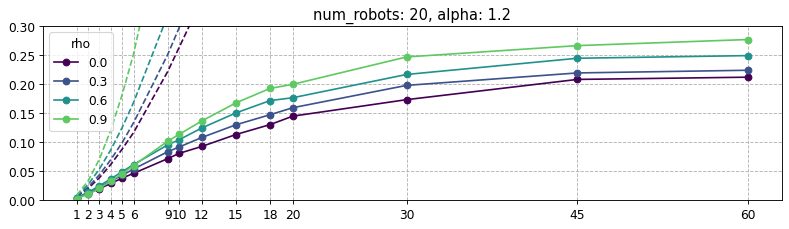

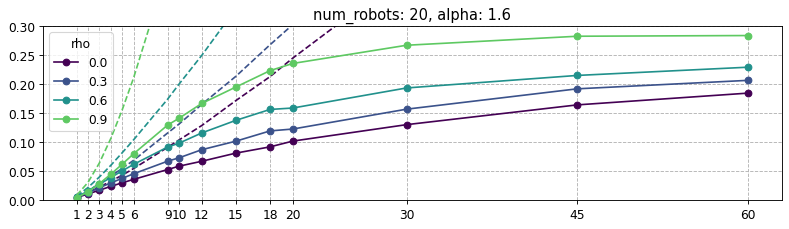

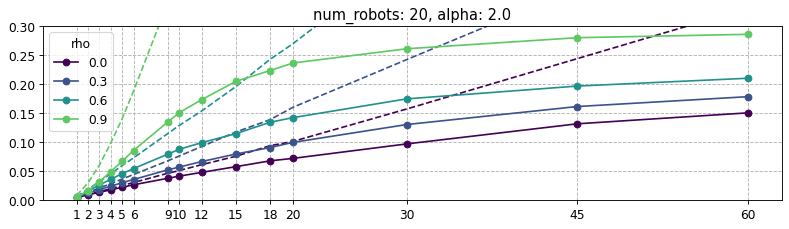

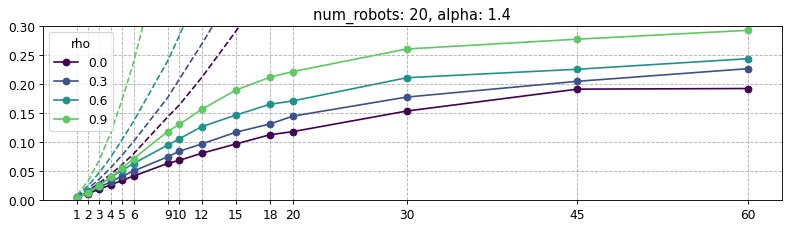

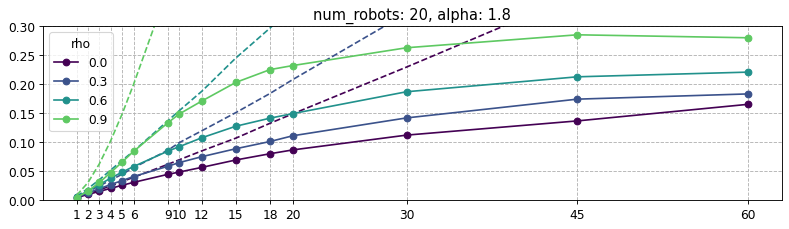

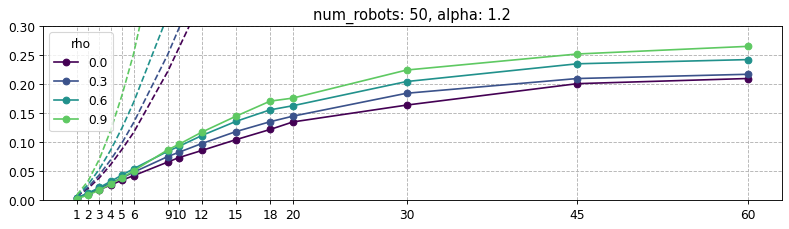

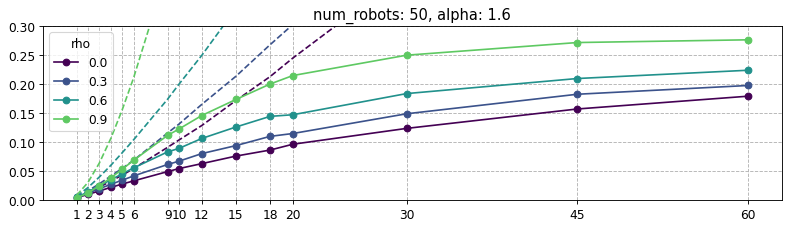

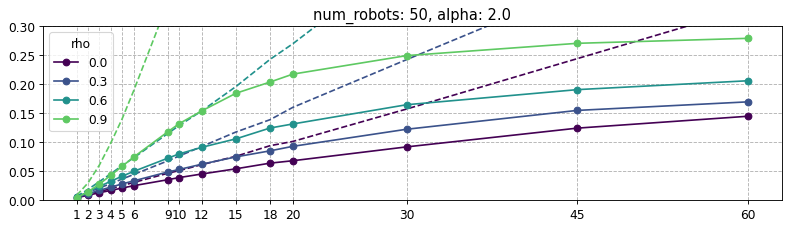

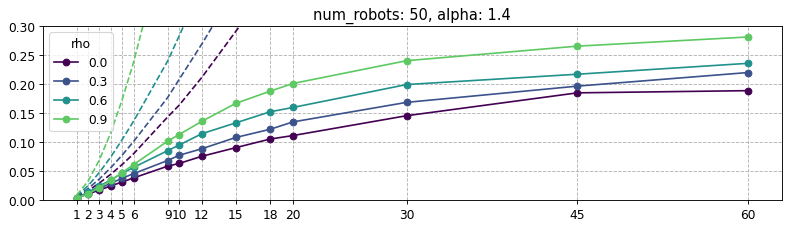

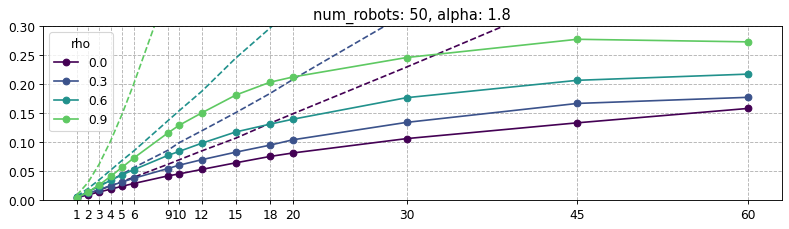

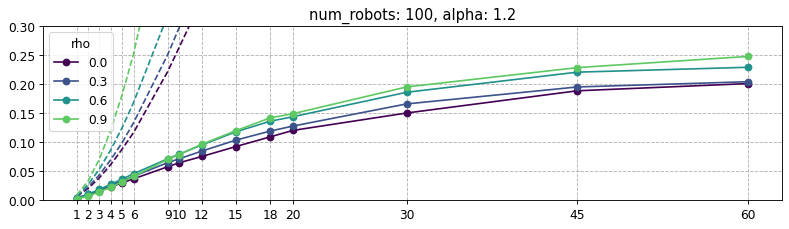

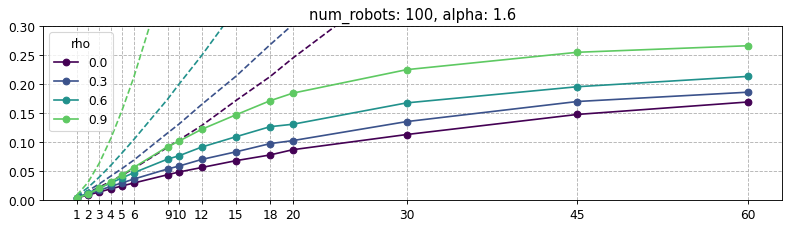

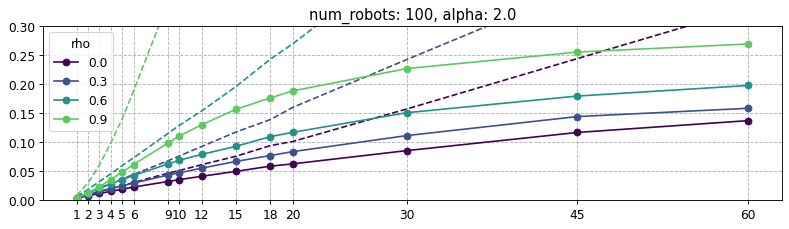

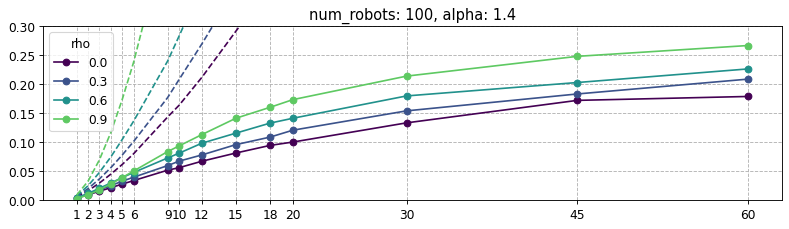

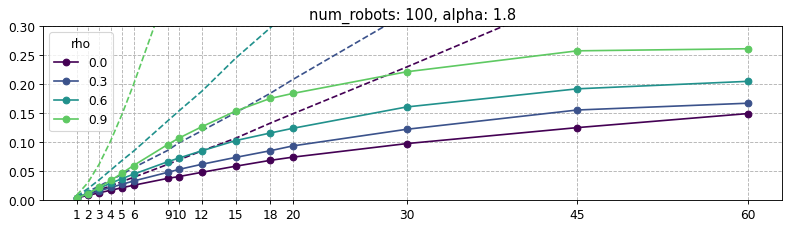

In [16]:
plot_MSD(simpleExperiment_dict, baseline_dict, top_v=0.3, saveFig=True, figName='simpleExperiment_')

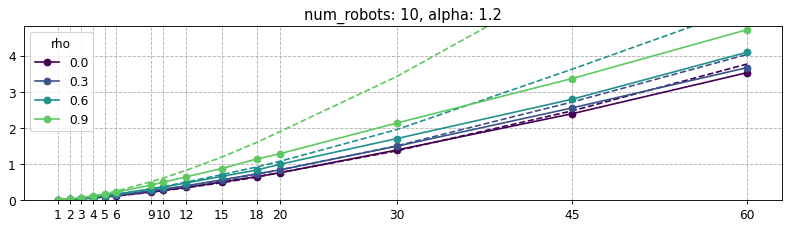

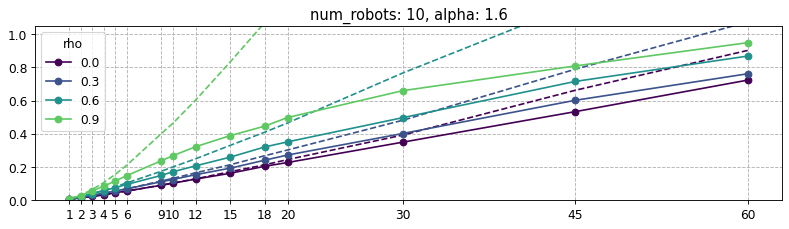

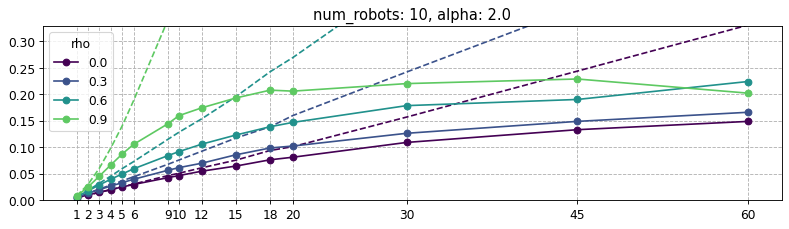

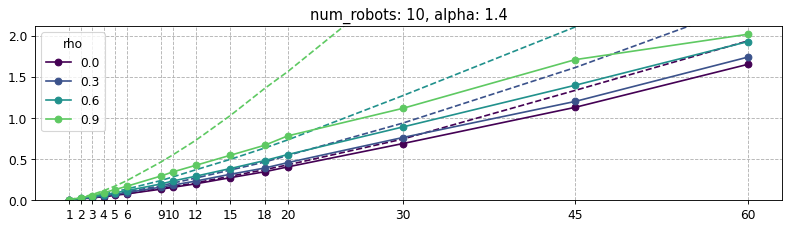

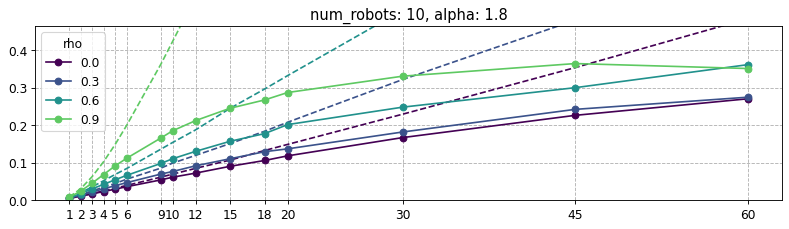

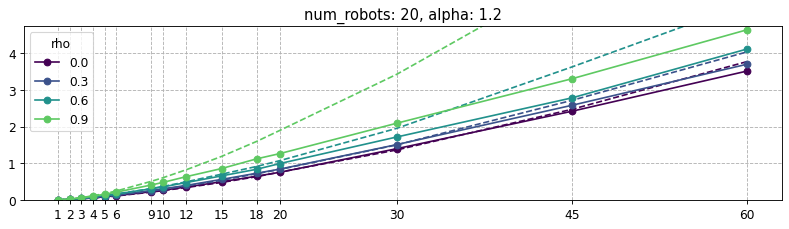

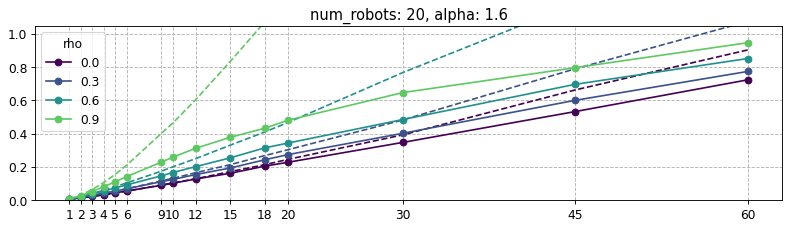

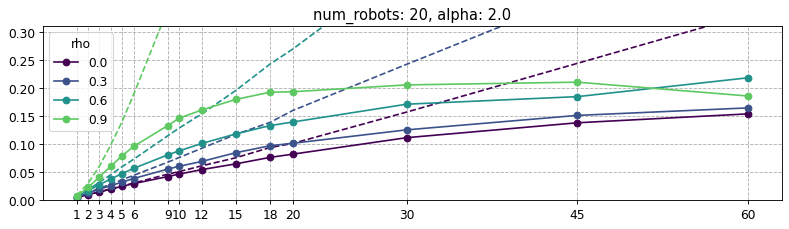

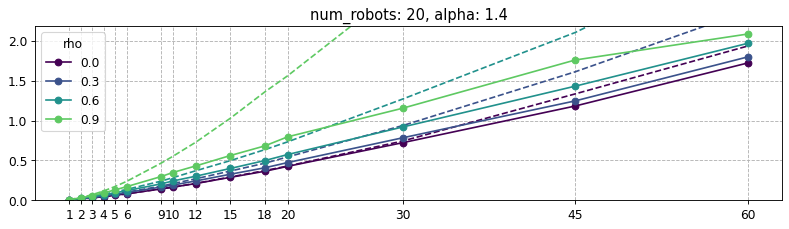

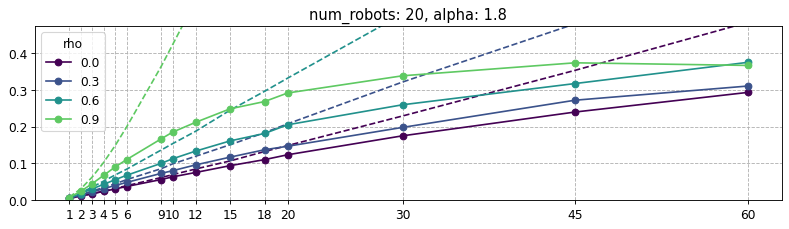

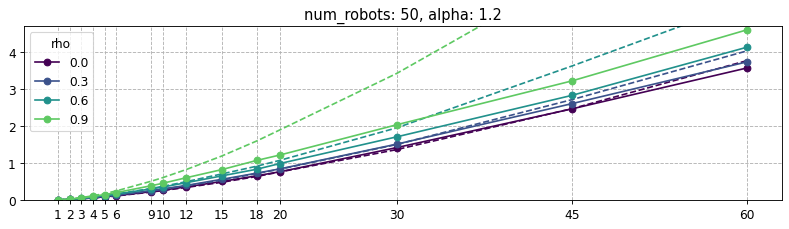

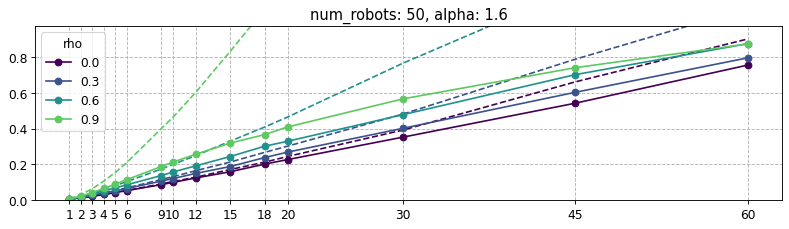

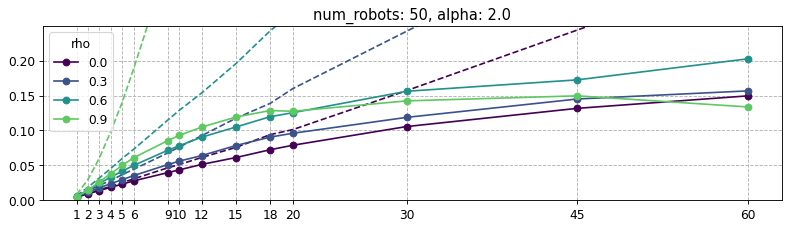

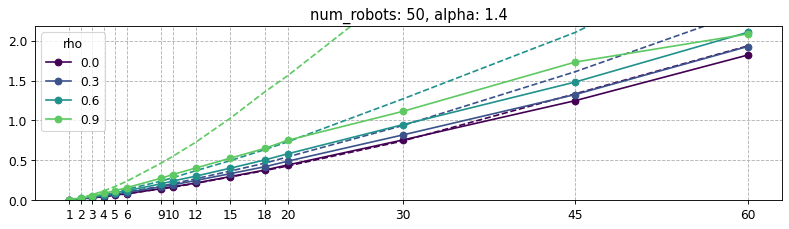

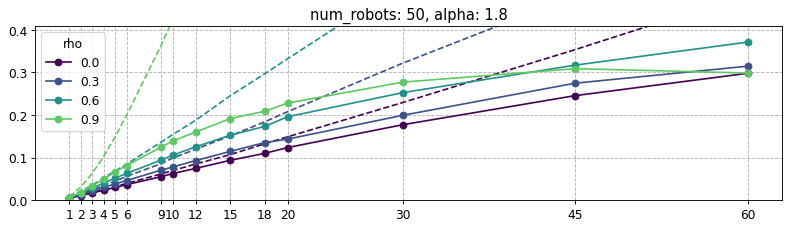

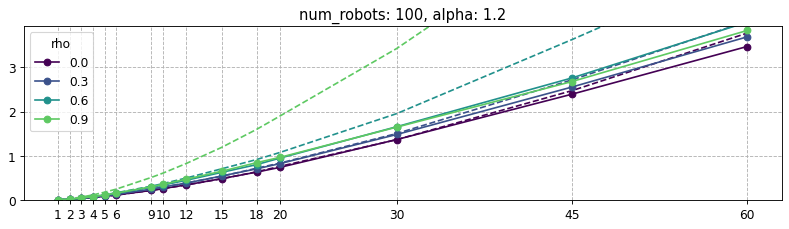

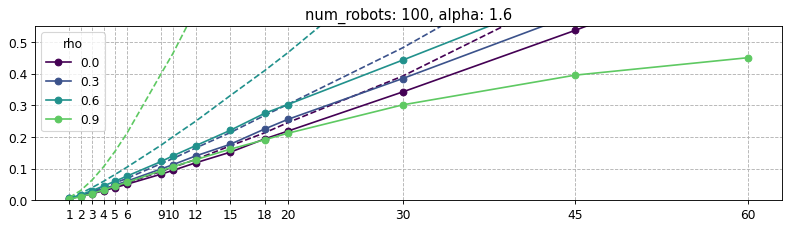

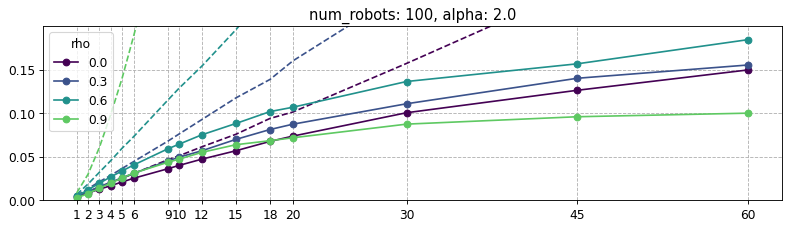

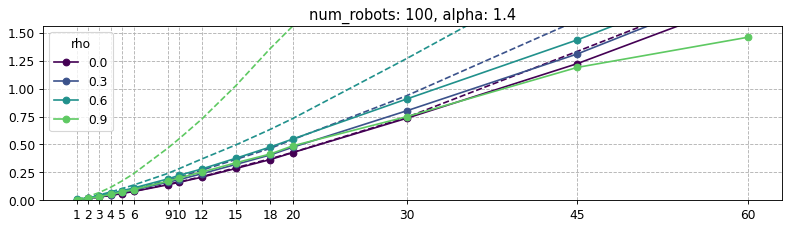

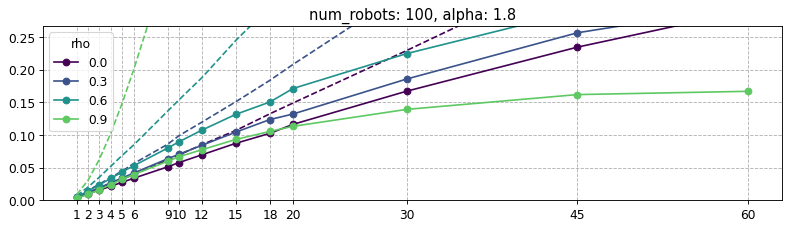

In [17]:
plot_MSD(biasExperiment_dict, baseline_dict, top_v=0, saveFig=True, figName='openSpace_')